# <span style="color:#f26a81">CP321 Final Project</span>
***
#### Data Visualization 
#### Dr. Jiashu (Jessie) Zhao
#### Winter 2024
#### Authors: Anousheh Shahid (210179080), Maham Farooq (200498180), Razan Mohamed (169035150)




# <span style="color:#f26a81">Introduction and Motivation</span> 
***
During the COVID-19 pandemic, vaccinations were a crucial weapon in safeguarding public health. As vaccination efforts still progress to this day, it's important to understand how effective these vaccines are in preventing cases across multiple age groups. Our project focuses on understanding the relationship between vaccination rates and COVID-19 cases within specific age groups in Ontario, Canada.

Our motivation for this study came from the curiosity of understanding how effective these vaccination campaigns were throughout the pandemic. While many vaccines were distributed across Ontario, the number of doses taken varied across age groups. This raised the question of how effective these vaccines were in battling the COVID-19 pandemic. By comparing two data sets about confirmed positive COVID-19 cases and vaccination rates among different age cohorts, we want to find out whether there is a connection between higher vaccination rates and a decrease in COVID-19 cases within the same age group.

We believe our findings will be very useful for Public Health Ontario and the general public in knowing how important vaccinations are. If there is a strong correlation between vaccination rates and reduced COVID-19 cases within specific age groups, it would prove the effectiveness of vaccination campaigns. If there is no correlation, then this would force Public Health Ontario to come up with a better solution in combating COVID-19. Through data visualization and quantitative analysis, we aspire to provide key insights in the fight against COVID-19 in Ontario.


# <span style="color:#f26a81">Methodology</span>
***
 Propose Approach (your question, data set description,
data processing, Visualization Description and Analysis)
### Question: 
Is there a correlation between COVID-19 vaccination rates and COVID-19 cases amongst different age cohorts?
### Data set description: 
We have used two datasets from data.ontario.ca to compare the number of positive COVID-19 cases to vacanation rates by over time. 

### Data Processing




Positive COVID-19 Cases over Time Dataset source: Government of Ontario https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350 

Vaccination rates by age over Time Dataset source: Government of Ontario

In [63]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Preprocessing the first dataset

#load the first dataset
vaxx = pd.read_csv('vaccines_by_age.csv')


#Filter the data by date range
start_date = '2021-01-01'
end_date = '2024-03-01'

vaxx['Date'] = pd.to_datetime(vaxx['Date'])  
m = (vaxx['Date'] > start_date) & (vaxx['Date'] <= end_date)
vaxx = vaxx.loc[m]
#Remove incomplete/unclear values and filter the age range
vaxx = vaxx.drop(vaxx[(vaxx['Agegroup'] == 'Undisclosed_or_missing') | (vaxx['Agegroup'] == 'Adults_18plus') | (vaxx['Agegroup'] == 'Ontario_12plus') |(vaxx['Agegroup'] == 'Ontario_5plus')| (vaxx['Agegroup'] == '05-11yrs')  | (vaxx['Agegroup'] == '12-17yrs')  | (vaxx['Agegroup'] == '18-29yrs')].index)
#Group by age

vaxx.head(20)

#--------------------------------------------------------------------------
#Preprocessing the Second Dataset 

#load the second dataset
covid = pd.read_csv('conposcovidloc.csv')

#Filter the data by date range
covid['Case_Reported_Date'] = pd.to_datetime(covid['Case_Reported_Date'])  
m = (covid['Case_Reported_Date'] > start_date) & (covid['Case_Reported_Date'] <= end_date  ) & (covid['Accurate_Episode_Date'] > start_date)  
covid = covid.loc[m]
#Remove incomplete values and filter the age range
covid = covid.drop(covid[(covid['Case_Reported_Date'] == 'NaN') |(covid['Age_Group'] == '<20') |(covid['Age_Group'] == '20s')].index)
covid.head(15)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
206612,206613,2021-01-02,2021-01-02,NaN,NaN,40s,MALE,NaN,2240,Chatham-Kent Health Unit,435 Grand Avenue West,Chatham,N7M 5L8,www.ckphu.com,42.403861,-82.208561
206613,206614,2021-01-02,2021-01-02,NaN,NaN,50s,FEMALE,NaN,2258,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298
206614,206615,2021-01-02,2021-01-02,NaN,2021-01-02,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206615,206616,2021-01-02,2021-01-02,NaN,2021-01-02,50s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206616,206617,2021-01-02,2021-01-02,NaN,2021-01-11,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206617,206618,2021-01-02,2021-01-02,2020-12-30,NaN,70s,MALE,NaN,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
206619,206620,2021-01-02,2021-01-02,2021-01-02,2020-12-31,40s,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
206626,206627,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,FEMALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206627,206628,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206628,206629,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


This code performs preprocessing on both datasets. For the first dataset (`vaccines_by_age.csv`), it loads the data and filters it based on a specified date range. Then, it removes incomplete or irrelevant records and filters out specific age groups. Finally, it groups the data by age. The second dataset (`conposcovidloc.csv`) follows a similar procedure, removing incomplete records and filtering based on date range. It also filters out specific age groups. Both datasets undergo a series of steps to ensure data integrity and relevance before further analysis.

<!-- # <center> <span style="color:#f26a81">Grouped Bar Plot of COVID-19 Cases Based on Age and Vaccination Status</span></center>  -->
## Grouped Bar Plot of COVID-19 Cases Based on Age and Vaccination Status

<Figure size 1200x600 with 0 Axes>

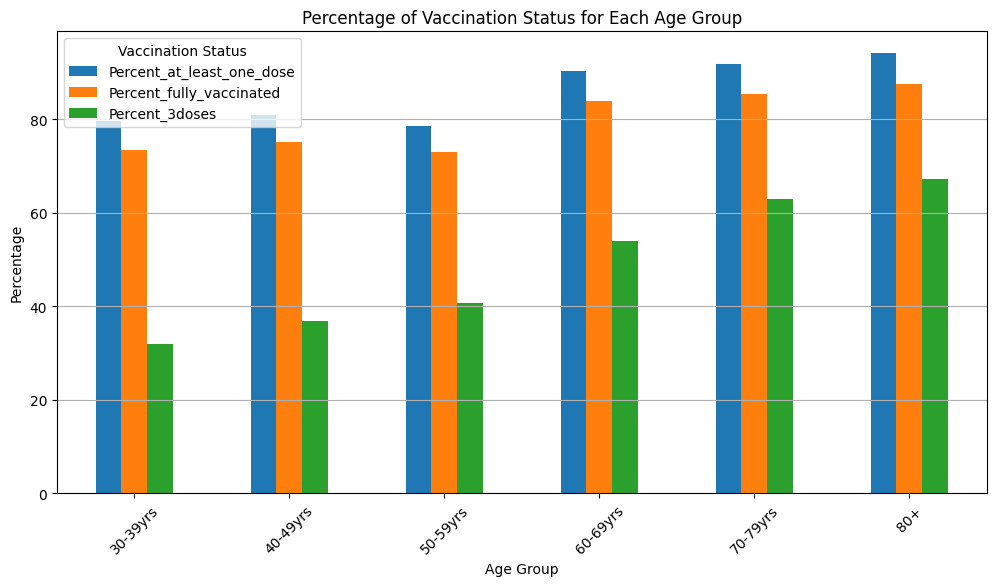

In [64]:
vaxx = vaxx.sort_values('Date')
plt.figure(figsize=(12, 6))

vaxx['Date'] = pd.to_datetime(df['Date'])
percentage_data = vaxx.groupby('Agegroup')[['Percent_at_least_one_dose', 'Percent_fully_vaccinated', 'Percent_3doses']].mean()*100

# Plot bar plot for percentage vaccination data
percentage_data.plot(kind='bar', figsize=(12, 6))


plt.title('Percentage of Vaccination Status for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.grid(axis='y')
plt.show()

Our first visualization provides insights into vaccination statuses across diverse age groups, focusing on three key categories: individuals with one dose, fully vaccinated (having received two doses), or those who have obtained a third dose. To show the distribution of vaccination uptake across age demographics, we used a bar plot representation.

Upon analysis, there is a clear trend: the highest vaccination status across all age groups is at least one dose, indicating widespread initial vaccination coverage. The percentage of fully vaccinated individuals closely follows, slightly lower than those with one dose. However, the uptake of the third vaccine dose is notably lower than the first two doses, particularly evident among age groups under 70 years of age. In contrast, age groups aged 70 and above exhibit a higher rate of third-dose uptake.

While the lower uptake of the third dose may initially seem surprising, it aligns with policy changes implemented by the Government of Ontario on September 22, 2021$^{1}$. This policy was introduced to manage high-risk public settings where masks cannot be worn at all times, including restaurants, bars, clubs, event spaces, gyms, etc. The mandate required full vaccination and proof of vaccination for access to specific public settings, which led to a significant increase in the percentage of individuals with one and two doses across all age groups. Given that the third dose was recommended but not mandatory$^{2}$, and initially targeted vulnerable populations, this resulted in a higher uptake among age groups over 70 years of age.

## Quarterly Heatmap of COVID-19 Case Counts and Percentage of Fully Vaccinated by Age Group

In [65]:
# Preprocessing to show dates quarterly for both dataset
vaxx['Date'] = pd.to_datetime(vaxx['Date']) # Vaccines
vaxx['Quarter'] = vaxx['Date'].dt.to_period('Q')

covid['Case_Reported_Date'] = pd.to_datetime(covid['Case_Reported_Date']) # Covid Cases
covid['Quarter'] = covid['Case_Reported_Date'].dt.to_period('Q')

This preprocessing code organizes dates into quarterly periods for two datasets. For the first dataset, it converts the 'Date' column into datetime format using `pd.to_datetime`, then creates a new 'Quarter' column to represent the quarter of the year each date falls into using `.dt.to_period('Q')`. Similarly, for the second dataset, it follows the same procedure, converting the 'Case_Reported_Date' column into datetime format and creating a corresponding 'Quarter' column to categorize the dates into quarterly periods. This allows for easier analysis and visualization of the data based on quarterly trends.

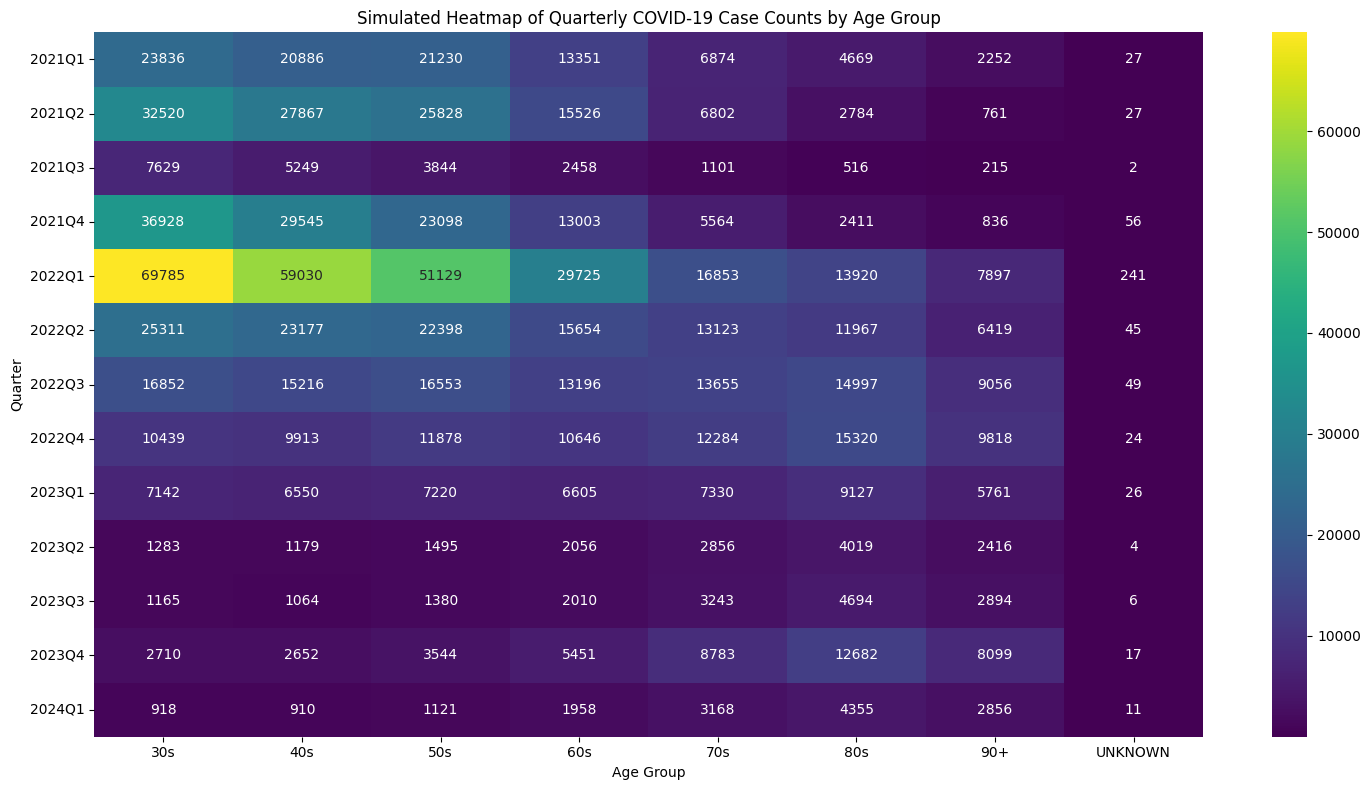

In [66]:
## Heatmap showcasing the sum of covid positive cases per age group every qaurter 

# cumulative covid case counts per age group for each quarter
case_counts_by_quarter = covid.groupby(['Age_Group', 'Quarter']).size().reset_index(name='Case_Counts')

# Pivot data for heatmap
case_counts_quarterly_pivot = case_counts_by_quarter.pivot(index='Quarter', columns='Age_Group', values='Case_Counts').fillna(0)
 
# plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(case_counts_quarterly_pivot, cmap='viridis', annot=True, fmt="d")
plt.title('Simulated Heatmap of Quarterly COVID-19 Case Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quarter')
plt.tight_layout() 
plt.show()

The second visualization is a heatmap that displays the total number of COVID-19 positive cases recorded per age group for each quarter. The data is aggregated to calculate the cumulative case counts per age group in every quarter. The heatmap's color intensity represents the magnitude of cases within specific age groups and quarters, offering insights into the distribution and trends of COVID-19 infections across different age demographics over time.

In 2021, there was a significant decrease in the number of cases across all age groups. Interestingly, the third quarter of 2021 saw the lowest number of COVID-19 cases overall among individuals 80+, contrary to expectations. However, in 2022, there was a dramatic increase, with cases doubling compared to the previous year across all age cohorts. This surge is attributed to the rapid spread of the new Omicron and Delta variants, as reported by Statistics Canada$^{3}$. The cases were especially high in the first quarter of 2022 across all age groups. In particular, the 30s age group experienced the highest number of cases overall during this period, signifying that they were most effected by the COVID-19 variants.

In 2023, there was a decline once again in the number of cases across all age groups. However, in the fourth quarter of 2023, there was a sudden spike in cases amongst the 80+ age group. According to insights provided by Dr. Isaac Bogoch, an Infectious Disease Specialist at Unity Health Network, this spike in cases among the elderly in late 2023 could be attributed to the onset of flu season, as respiratory diseases tend to increase during the fall, particularly among seniors$^{4}$.

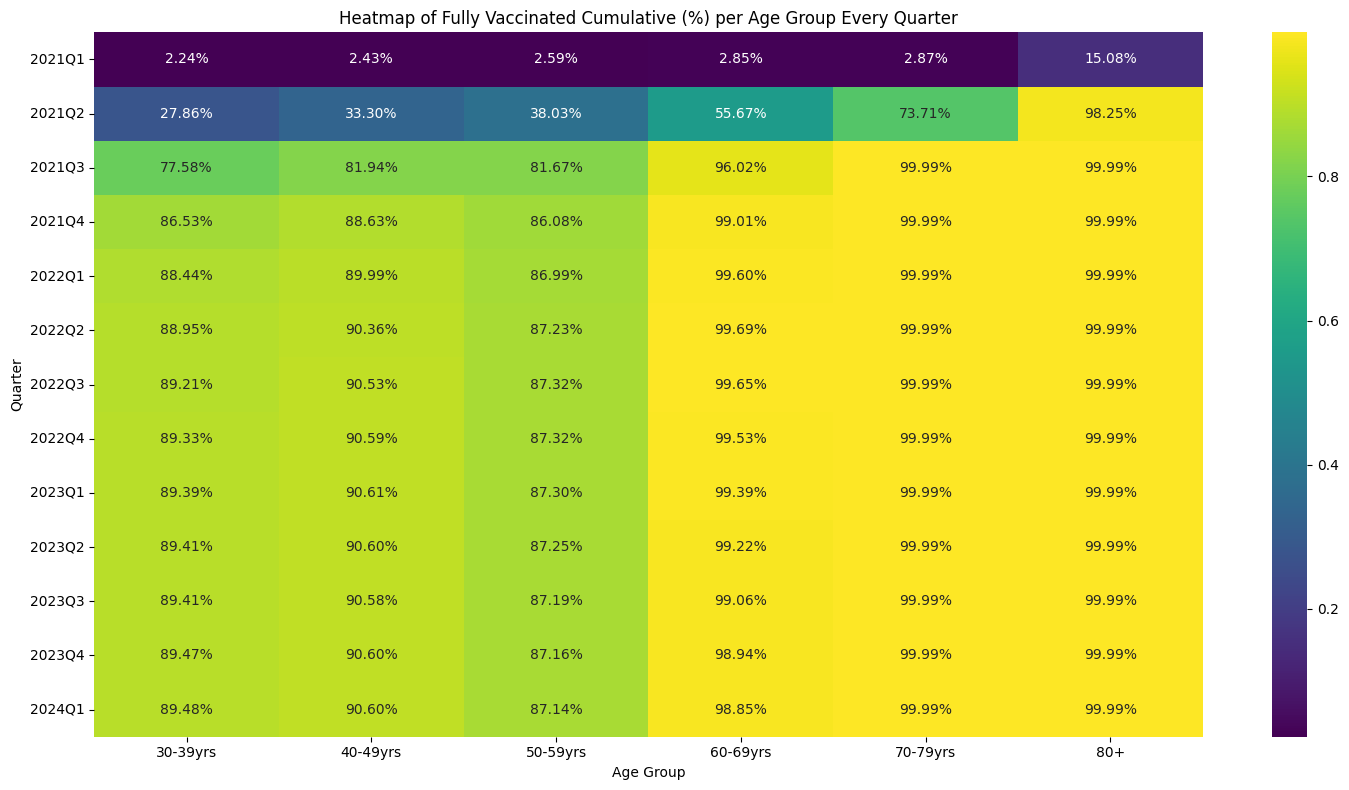

In [67]:
## Heatmap showcasing the percentage fully vaccinated people per age group every qaurter 

# fully_vaccinated_cumulative for each age group per quarter
quarter_vaxx = vaxx.groupby(['Agegroup', 'Quarter'])['Percent_fully_vaccinated'].last().reset_index()

# Pivot data for heatmap
quarterly_pivot = quarter_vaxx.pivot(index='Quarter', columns='Agegroup', values='Percent_fully_vaccinated').fillna(0)

# Generate the heatmap for quarterly vaccination rates
plt.figure(figsize=(15, 8))
sns.heatmap(quarterly_pivot, cmap='viridis', annot=True,fmt='.2%')  # Changed fmt to ".2f" for decimal formatting
plt.title('Heatmap of Fully Vaccinated Cumulative (%) per Age Group Every Quarter')
plt.xlabel('Age Group')
plt.ylabel('Quarter')
plt.tight_layout()
plt.show()


This visualization is a heatmap representing the percentage of fully vaccinated individuals within different age groups over consecutive quarters in Ontario. Each cell in the heatmap displays the cumulative percentage of fully vaccinated people for a specific age group during a particular quarter. The visualization allows for a clear comparison of vaccination progress across age groups and over time, offering insights into vaccination trends and coverage within the population.

Beginning in 2021, the heatmap illustrates the initial rollout of COVID-19 vaccines, which primarily targeted vulnerable populations, such as the elderly. As expected, the fully vaccinated rate was initially low, mirroring the recent introduction of vaccines in late December 2020$^{5}$. As vaccination efforts gained momentum, particularly among seniors, by the third quarter of 2021, the 70+ age group had nearly achieved full vaccination status. This milestone was accompanied by a notable decline in COVID-19 cases within this demographic, showcasing the effectiveness of vaccination in mitigating the spread of the virus among the most at risk demographics.

In 2022, despite approximately 80% of individuals up to 70 years old being fully vaccinated, the number of COVID-19 cases remained stubbornly elevated. This was largely attributed to the emergence of various COVID-19 variants, which spread rapidly amongst all age groups. Particularly in the first quarter of 2022, the younger population (aged 30-50s) experienced the highest number of COVID-19 cases. This could be linked to a significant portion of individuals in this age group not yet achieving full vaccination status, in contrast to the remarkably high vaccination rate among those aged 60 and above, which reached 99%.

In 2023, vaccination campaigns continued to progress, especially among individuals aged 30-60s and the there was a downtrend in the number of COVID-19 cases within these age brackets. This downward trajectory depicts a clear correlation between increasing vaccination rates and the decline in COVID-19 cases across different age groups, supporting the role of vaccination in mitigating the spread of COVID-19.


## Normalized Stacked Area Chart for Fully Vaccinated People and COVID-19 cases Aged 80+

In [68]:
# function to return matching age groups - Convert the first format ('30-39yrs') to the second format ('30s')
def convert_age_group_format(age_group):
    if  age_group == '80s' or age_group.startswith('90'):
        return '80+'
    elif age_group.endswith('yrs'):
        return age_group[:2] + 's'
    elif age_group == 'UNKNOWN':
        return None
    else:
        return age_group

vaxx['Agegroup'] = vaxx['Agegroup'].apply(convert_age_group_format)
covid['Age_Group'] = covid['Age_Group'].apply(convert_age_group_format)

vaxx = vaxx[vaxx['Agegroup'].notna()]
covid = covid[covid['Age_Group'].notna()]

print("Unique Age Groups in Vaccination Data:", vaxx['Agegroup'].unique())
print("Unique Age Groups in Case Data:", covid['Age_Group'].unique())


Unique Age Groups in Vaccination Data: ['30s' '40s' '50s' '60s' '70s' '80+']
Unique Age Groups in Case Data: ['40s' '50s' '30s' '70s' '60s' '80+']


This code performs preprocessing tasks related to age group data. It defines a function called convert_age_group_format() that standardizes age group labels from one format ('30-39yrs') to another ('30s'). It handles various cases, such as converting age ranges to a simplified format ('30-39yrs' becomes '30s'), converting '80s' and '90s' to '80+', handling 'UNKNOWN' values, and leaving other formats unchanged.

The function is then applied to the 'Agegroup' column in dataframe vaxx and the 'Age_Group' column in dataframe covid using the apply() method. Afterwards, rows with missing age group values are filtered out (notna()), ensuring only valid age group data is retained for analysis. Finally, the unique age groups present in both dataframes are printed for further examination.


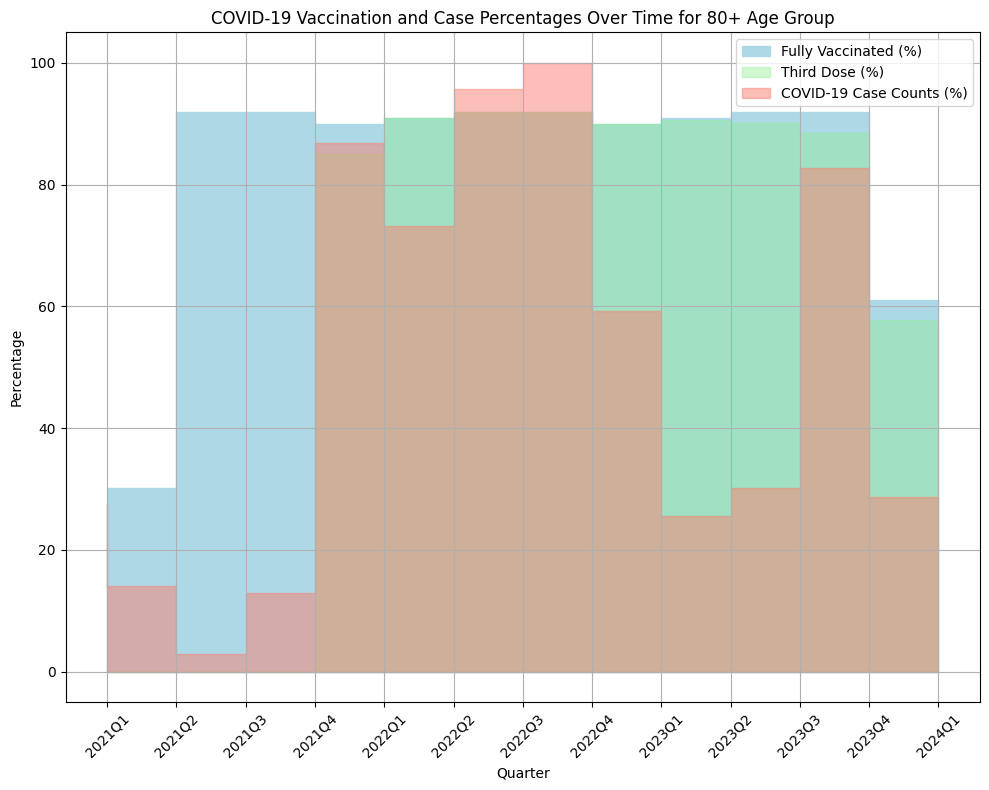

In [71]:
## Normalized Stacked Area Chart showcasing fully vaccinated people and covid cases over time for people aged 80 and over 

# Filter for 80+ age group and aggregate data
vaccination_data = vaxx[vaxx['Agegroup'] == '80+'].groupby('Quarter')['Percent_fully_vaccinated'].sum().reset_index()
vaccination_data_3 = vaxx[vaxx['Agegroup'] == '80+'].groupby('Quarter')['Percent_3doses'].sum().reset_index()
case_data = covid[covid['Age_Group'] == '80+'].groupby('Quarter').size().reset_index(name='Case_Counts')

# Normalize case counts to the maximum count across quarters for a percentage scale
max_cases = case_data['Case_Counts'].max()
case_data['Case_Counts_Percent'] = (case_data['Case_Counts'] / max_cases) * 100

# plot
plt.figure(figsize=(10, 8))

# Area plot for vaccine and case data
plt.fill_between(vaccination_data['Quarter'].astype(str), vaccination_data['Percent_fully_vaccinated'], label='Fully Vaccinated (%)', color='lightblue', step='pre')
plt.fill_between(vaccination_data_3['Quarter'].astype(str), vaccination_data_3['Percent_3doses'], label='Third Dose (%)', color='lightgreen', step='pre',alpha=0.4)
plt.fill_between(case_data['Quarter'].astype(str), case_data['Case_Counts_Percent'], label='COVID-19 Case Counts (%)', color='salmon', step='pre', alpha=0.5)

plt.title('COVID-19 Vaccination and Case Percentages Over Time for 80+ Age Group')
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In our final visualization, we analyzed the effectiveness of vaccinations for individuals aged 80+, a group identified by Dr. Bogoch as 'particularly vulnerable to hospitalization and mortality from COVID-19$^{4}$. In 2021, there was a prominent positive shift in the ratio of cases to fully vaccinated individuals among seniors. By the first quarter of 2021, 90% of seniors had received full vaccination, resulting in a significant decrease in cases by nearly 20%.

However, with the emergence of new COVID-19 variants like Omicron and Delta in 2022, there was a drastic surge in cases due to their rapid spread. An intriguing discovery occurred in 2022Q1, where the percentage of individuals with three vaccine doses exceeded the percentage of COVID-19 cases among seniors. This finding contrasts with other age groups experiencing higher case levels during the same quarter but with fewer vaccine doses. Although subsequent quarters in 2022 still showed elevated case percentages, this trend was within expected norms ansignificantlyly lower than in other age demographics.

By 2023, there was a substantial decline in the percentage of COVID-19 cases relative to vaccination rates among seniors. This demonstrates the effectiveness of receiving a third vaccine dose for individuals aged 80+.


# <span style="color:#f26a81">Conclusion</span>
***
In conclusion, this study has looked closely at how vaccination rates and COVID-19 cases relate across different age groups in Ontario, Canada. The main goal was to see how well vaccination campaigns are working, especially considering that people in different age groups might be getting vaccinated at different rates.

The findings from this study strong correlation between COVID-19 cases and vaccination status. Firstly, most individuals across all age groups in Ontario have gotten their first vaccine dose, showing that initial vaccination coverage is widespread. Second doses are also common, though not as high as first doses. However, when it comes to the third vaccine dose, especially for people under 70, not as many people are getting it. This could be because it's not mandatory like the first two doses were.

Looking at COVID-19 cases over time, we see some positive and negative trends. In 2021, cases went down across all age groups. However, in 2022, with new variants like Omicron and Delta, cases shot up again, especially among younger adults aged 30-50s. The number of cases improved in 2023, with fewer cases, especially among senior.

One notable finding is how effective vaccinations have been for seniors aged 80 and above. When many seniors had gotten fully vaccinated in 2021, COVID-19 cases among them dropped significantly. Even when cases surged again in 2022, the number of vaccinated seniors exceeded the number of cases, especially for those who got the third dose.

In summary, this study shows that vaccinations is crucial in fighting COVID-19. It's clear that as more people get vaccinated, especially with all three doses, we see fewer cases across all age groups. These findings are important for Public Health Ontario to make informed decisions and everyone else working to keep us safe from COVID-19 and its variants. As we continue conquering the pandemic, it's essential to keep pushing vaccination efforts and making sure everyone has access to them across all age demographics.


# <span style="color:#f26a81">References</span>
***
1. Ontario to Require Proof of Vaccination in Select Settings. Ontario newsroom. (2021b, September 1). https://news.ontario.ca/en/release/1000779/ontario-to-require-proof-of-vaccination-in-select-settings#quickfacts 
2. Expanded Eligibility for Third Doses of the COVID-19 Vaccine. Ontario newsroom. (2021a, September 14). https://news.ontario.ca/en/backgrounder/1000805/expanded-eligibility-for-third-doses-of-the-covid-19-vaccine 
3. Third week of January 2022 was deadliest of pandemic: Statcan. CTVNews. (2023, January 12). https://www.ctvnews.ca/health/coronavirus/third-week-of-january-2022-was-deadliest-of-pandemic-statcan-1.6228479 
4. O’Brien, A. (2023, November 27). Ontario is reporting a surge in COVID-19. what does that mean for us?. CP24. https://www.cp24.com/news/ontario-is-reporting-a-surge-in-covid-19-what-does-that-mean-for-us-1.6662964?cache=%2Ffeed%2F 
5. Wikimedia Foundation. (2023, September 19). Covid-19 vaccination in Ontario. Wikipedia. https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Ontario 